In [1]:
x=1

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import decoupler as dc

from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/multimil_reproducibility/pipeline/data/reports/best.tsv', sep='\t', index_col=None)

## totalvi full

In [4]:
task = 'totalvi_pbmc_embed_all_cond'

In [5]:
runs = {}
yerr = {}
df_task = df[df['task'] == task]
for method in np.unique(df_task['method']):
    runs[method] = eval(df_task.loc[df_task['method'] == method, 'accuracies'].values[0])
    yerr[method] = np.array(runs[method]).std()

df_tmp = df_task[['method', 'accuracy']]
df_tmp.index = df_tmp['method']
df_tmp = df_tmp[['accuracy']].sort_values('accuracy', ascending=False)
df_tmp = df_tmp.T

yerr_sorted = [yerr[method] for method in df_tmp.columns]

In [6]:
df_tmp.columns

Index(['ct_pb_rf', 'multigrate_mil', 'freq_nn', 'pb_nn', 'ct_pb_mr',
       'ct_pb_nn', 'multigrate_mil_reg', 'freq_rf', 'pb_mr', 'gex_nn',
       'gex_rf', 'pb_rf', 'freq_mr'],
      dtype='object', name='method')

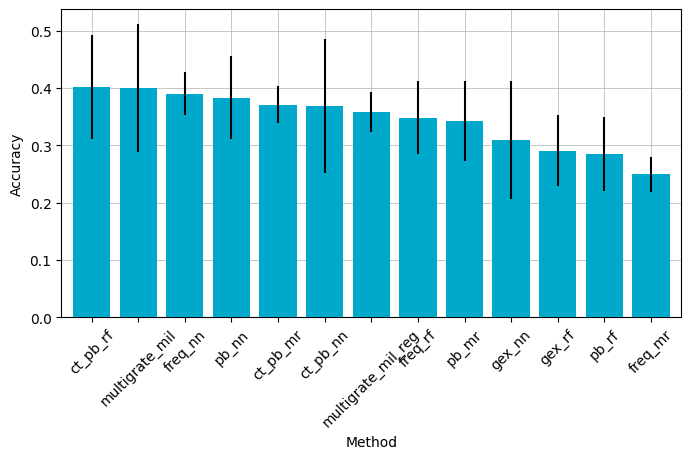

In [7]:
ax = df_tmp.T.plot(kind='bar', zorder=3, figsize=(8, 4), color=["#00a8cc"], rot=45, yerr=yerr_sorted, width=0.8)
ax.get_legend().remove()
ax.grid(zorder=0, linewidth=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('')
plt.savefig('figures/pbmc_accuracy_full_totalvi.svg', bbox_inches='tight')

## totalvi binary

In [8]:
task = 'totalvi_pbmc_embed_binary_balanced'

In [9]:
runs = {}
yerr = {}
df_task = df[df['task'] == task]
for method in np.unique(df_task['method']):
    runs[method] = eval(df_task.loc[df_task['method'] == method, 'accuracies'].values[0])
    yerr[method] = np.array(runs[method]).std()

df_tmp = df_task[['method', 'accuracy']]
df_tmp.index = df_tmp['method']
df_tmp = df_tmp[['accuracy']].sort_values('accuracy', ascending=False)
df_tmp = df_tmp.T

yerr_sorted = [yerr[method] for method in df_tmp.columns]

In [10]:
df_tmp.columns

Index(['multigrate_mil', 'pb_mr', 'ct_pb_mr', 'ct_pb_rf', 'ct_pb_nn',
       'freq_rf', 'pb_rf', 'pb_nn', 'freq_nn', 'gex_rf', 'freq_mr', 'gex_nn'],
      dtype='object', name='method')

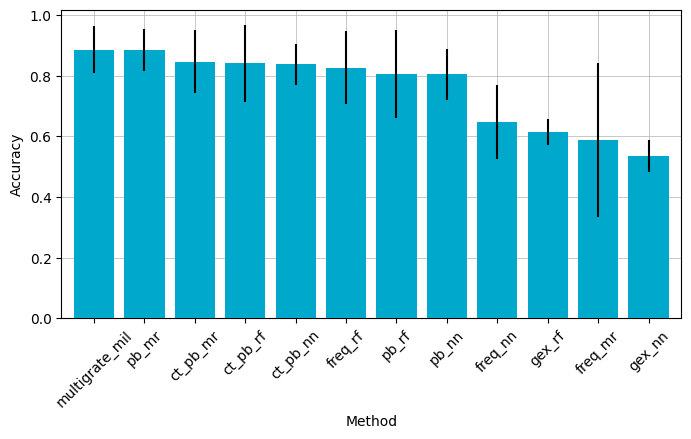

In [11]:
ax = df_tmp.T.plot(kind='bar', zorder=3, figsize=(8, 4), color=["#00a8cc"], rot=45, yerr=yerr_sorted, width=0.8)
ax.get_legend().remove()
ax.grid(zorder=0, linewidth=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('')
plt.savefig('figures/pbmc_accuracy_binary_totalvi.svg', bbox_inches='tight')

## multimil full

In [12]:
task = 'pbmc_mtg_final1_full_covid'

In [13]:
runs = {}
yerr = {}
df_task = df[df['task'] == task]
for method in np.unique(df_task['method']):
    runs[method] = eval(df_task.loc[df_task['method'] == method, 'accuracies'].values[0])
    yerr[method] = np.array(runs[method]).std()

df_tmp = df_task[['method', 'accuracy']]
df_tmp.index = df_tmp['method']
df_tmp = df_tmp[['accuracy']].sort_values('accuracy', ascending=False)
df_tmp = df_tmp.T

yerr_sorted = [yerr[method] for method in df_tmp.columns]

In [14]:
df_tmp.columns

Index(['multigrate_mil', 'ct_pb_mr', 'ct_pb_nn', 'pb_nn', 'ct_pb_rf',
       'multigrate_mil_reg', 'freq_nn', 'pb_rf', 'freq_rf', 'gex_nn', 'gex_rf',
       'freq_mr'],
      dtype='object', name='method')

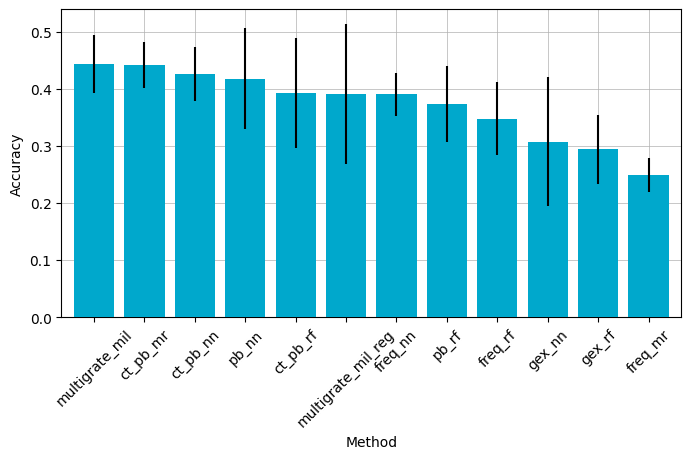

In [15]:
ax = df_tmp.T.plot(kind='bar', zorder=3, figsize=(8, 4), color=["#00a8cc"], rot=45, yerr=yerr_sorted, width=0.8)
ax.get_legend().remove()
ax.grid(zorder=0, linewidth=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('')
plt.savefig('figures/pbmc_accuracy_full_multimil.svg', bbox_inches='tight')

## multimil binary

In [16]:
task = 'pbmc_mtg_final1_binary_balanced'

In [17]:
runs = {}
yerr = {}
df_task = df[df['task'] == task]
for method in np.unique(df_task['method']):
    runs[method] = eval(df_task.loc[df_task['method'] == method, 'accuracies'].values[0])
    yerr[method] = np.array(runs[method]).std()

df_tmp = df_task[['method', 'accuracy']]
df_tmp.index = df_tmp['method']
df_tmp = df_tmp[['accuracy']].sort_values('accuracy', ascending=False)
df_tmp = df_tmp.T

yerr_sorted = [yerr[method] for method in df_tmp.columns]

In [18]:
df_tmp.columns

Index(['ct_pb_nn', 'multigrate_mil', 'pb_rf', 'pb_nn', 'ct_pb_rf', 'pb_mr',
       'ct_pb_mr', 'freq_rf', 'gex_rf', 'freq_nn', 'freq_mr', 'gex_nn'],
      dtype='object', name='method')

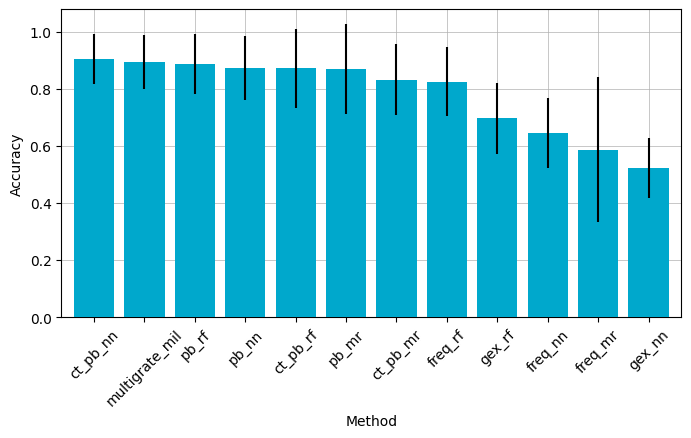

In [19]:
ax = df_tmp.T.plot(kind='bar', zorder=3, figsize=(8, 4), color=["#00a8cc"], rot=45, yerr=yerr_sorted, width=0.8)
ax.get_legend().remove()
ax.grid(zorder=0, linewidth=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('')
plt.savefig('figures/pbmc_accuracy_binary_multimil.svg', bbox_inches='tight')